In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

#'Distribution of Average Performance by District (Ranked by Average)'

def chart_boxplots(xdataframe,
                   xcolumn_group, 
                   xcolumn_value,
                   xtitle,
                   xfile_name):
    '''
    create a box plot of school performance
    
    '''
    #1. Calculate the average performance for each district
    average_df = xdataframe.groupby(xcolumn_group)[xcolumn_value].mean().sort_values(ascending=False)

    # 2. put data in right order 

    #Get the order of districts based on average performance
    district_order = average_df.index

    # 3. Create the vertical box plot using seaborn
    # Swap x and y, and potentially adjust figure size for a taller plot
    plt.figure(figsize=(10, 12)) # Increased height for vertical layout
    sns.boxplot(x=xcolumn_value, y=xcolumn_group, data=xdataframe, order=district_order) # Swapped x and y
    
    # Labels 
    plt.title(xtitle)
    plt.xlabel(xcolumn_value) # X-axis is now performance
    plt.ylabel(xcolumn_group)             # Y-axis is now district

    # No need to rotate y-axis labels usually
    # plt.yticks(rotation=0) # You can explicitly set rotation to 0 if needed

    # Adjust layout
    plt.tight_layout()

    # Add a vertical line at x=50
    plt.axvline(x=50, color='red', linestyle='--', linewidth=2)

    plt.savefig(xfile_name, format="svg")
   
    
    # Show the plot
    plt.show()

In [3]:
# function for map_district
def map_rwanda_choropleth_districts(xdataframe, 
                                    xcolumn,
                                    xtitle, 
                                    xlegend_label,
                                    xfile_name,
                                    xcolor_scheme):
    
    '''function to create a choropleth map for Rwanda
    require: 
    - a dataframe with a column called 'district' with the name of 
    - a column for the value with the values to be visualized 
    '''

    xdata_geo       =  './geo_data/rwanda_boundaries_admin_2.geojson'    # admin 2 (districts)
    xdata_geo_1     =  './geo_data/rwanda_boundaries_admin_1.geojson'    # admin 1 (provinces)
    xdata_geo_lakes =  './geo_data/rwanda_lakes.geojson'                 # lakes 
    xdata_geo_parks =  './geo_data/rwanda_protected_areas.geojson'       #protected areas 

    # read geodata (district level)
    xdf_geo_district = gpd.read_file(xdata_geo)
    # read geodata (province level)
    xdf_geo_province = gpd.read_file(xdata_geo_1)
    # read geodata (lakes)
    xdf_geo_lakes = gpd.read_file(xdata_geo_lakes)
    # read geodata (parks)
    xdf_geo_parks = gpd.read_file(xdata_geo_parks)


    # Merge the district data with the district geodata
    merged_df_district = xdf_geo_district.merge(xdataframe, left_on='shapeName', right_on='district', how='left')

    # Set up the plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    merged_df_district.plot(column=xcolumn, 
                            cmap=xcolor_scheme , 
                            linewidth=0.8, 
                            ax=ax, 
                            edgecolor='0.8', 
                            legend=True,
                            legend_kwds={'label': xlegend_label,'orientation': "horizontal"})

    # Plot the lakes
    xdf_geo_lakes.plot(ax=ax, color='lightblue', edgecolor='blue', linewidth=0.5) # Using lightblue for fill and blue for outline
    # Plot parcs 
    xdf_geo_parks.plot(ax=ax, color='lightgreen', edgecolor='green', linewidth=0.5) # Using lightblue for fill and blue for outline

    # Plot the province boundaries
    xdf_geo_province.plot(ax=ax, color='none', edgecolor='black', linewidth=1)


    # Add district labels with poverty rates
    for idx, row in merged_df_district.iterrows():
        centroid = row['geometry'].centroid
        plt.annotate(text=f"{row['shapeName']}", # Keep only district name for labels
                     xy=(centroid.x, centroid.y),
                     xytext=(3, 3),
                     textcoords="offset points",
                     fontsize=7,
                     ha='center',
                     color='black')

    # Set the title of the map
    ax.set_title(xtitle )

    # Remove axis ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])

    # Add a border around the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)


    # Show the plot
    plt.tight_layout()

    # Save the plot as an SVG file
    plt.savefig(xfile_name, format="svg")

    plt.show()

# Analysis 

## data 

In [4]:
## data 

df_pl = pd.read_excel('SchoolRanking.xlsx', sheet_name='PrimaryLevel')
df_ol = pd.read_excel('SchoolRanking.xlsx', sheet_name='OrdinaryLevel')

print('primary:', len(df_pl))
print('ordinary:', len(df_ol))


# Group by 'District' and apply the describe() method to 'Average_Performance_pct'
df_district_pl = df_pl.groupby('District')['Average_Performance_pct'].describe().reset_index()
df_district_ol = df_ol.groupby('District')['Average_Performance_pct'].describe().reset_index()

#fix columns 
df_district_pl.columns = ['district', 'count', 'mean', 'std', 'min', '25_pct', 'median', '75_pct', 'max']
df_district_ol.columns = ['district', 'count', 'mean', 'std', 'min', '25_pct', 'median', '75_pct', 'max']


print('primary:',  len(df_district_pl))
print('ordinary:', len(df_district_ol))


primary: 3724
ordinary: 1871
primary: 30
ordinary: 30


## Boxplots 

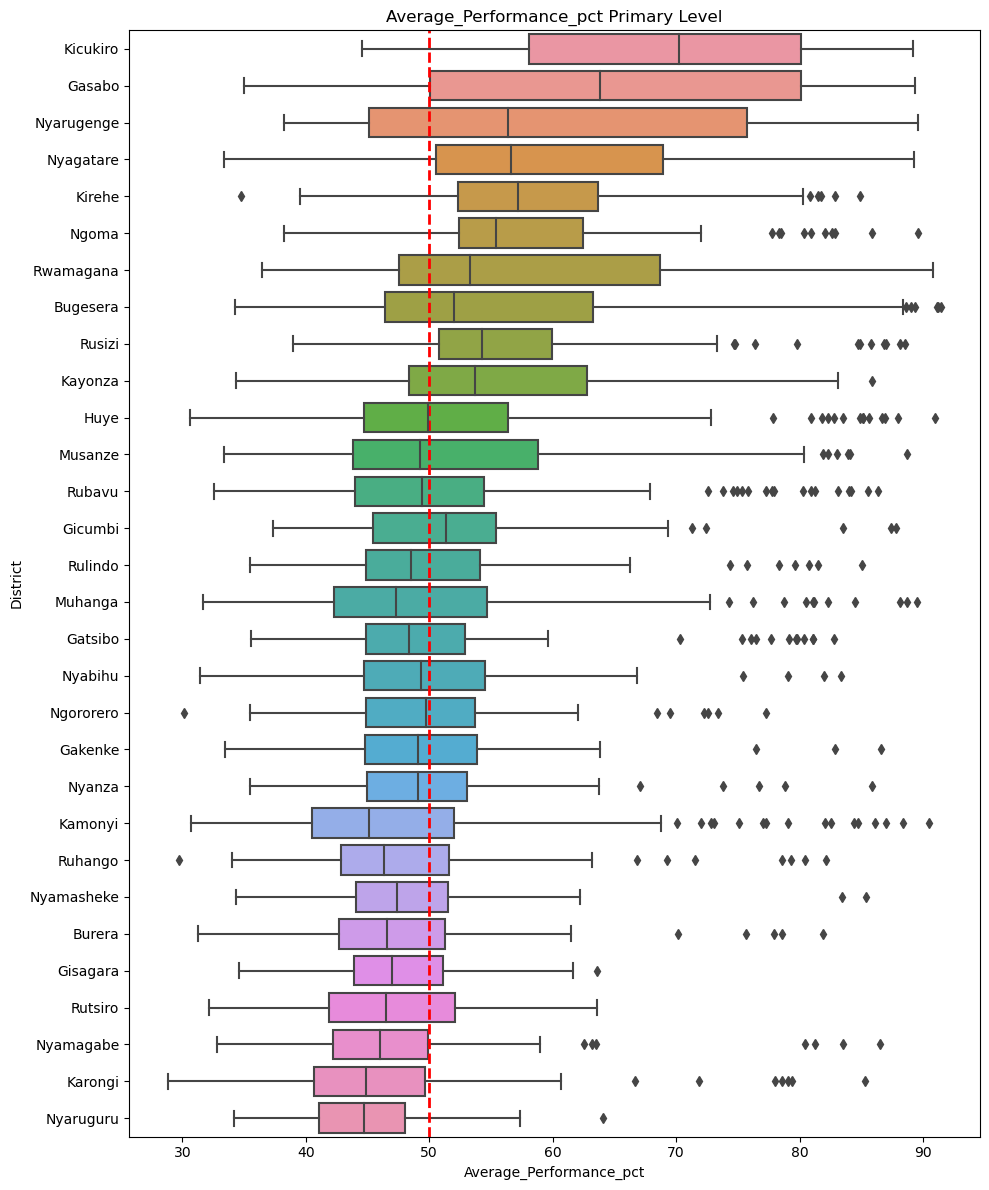

In [5]:
#primary 
chart_boxplots(xdataframe = df_pl ,
               xcolumn_group = 'District', 
               xcolumn_value = 'Average_Performance_pct',
               xtitle = 'Average_Performance_pct Primary Level',
              xfile_name = 'average_performance_pl.svg')

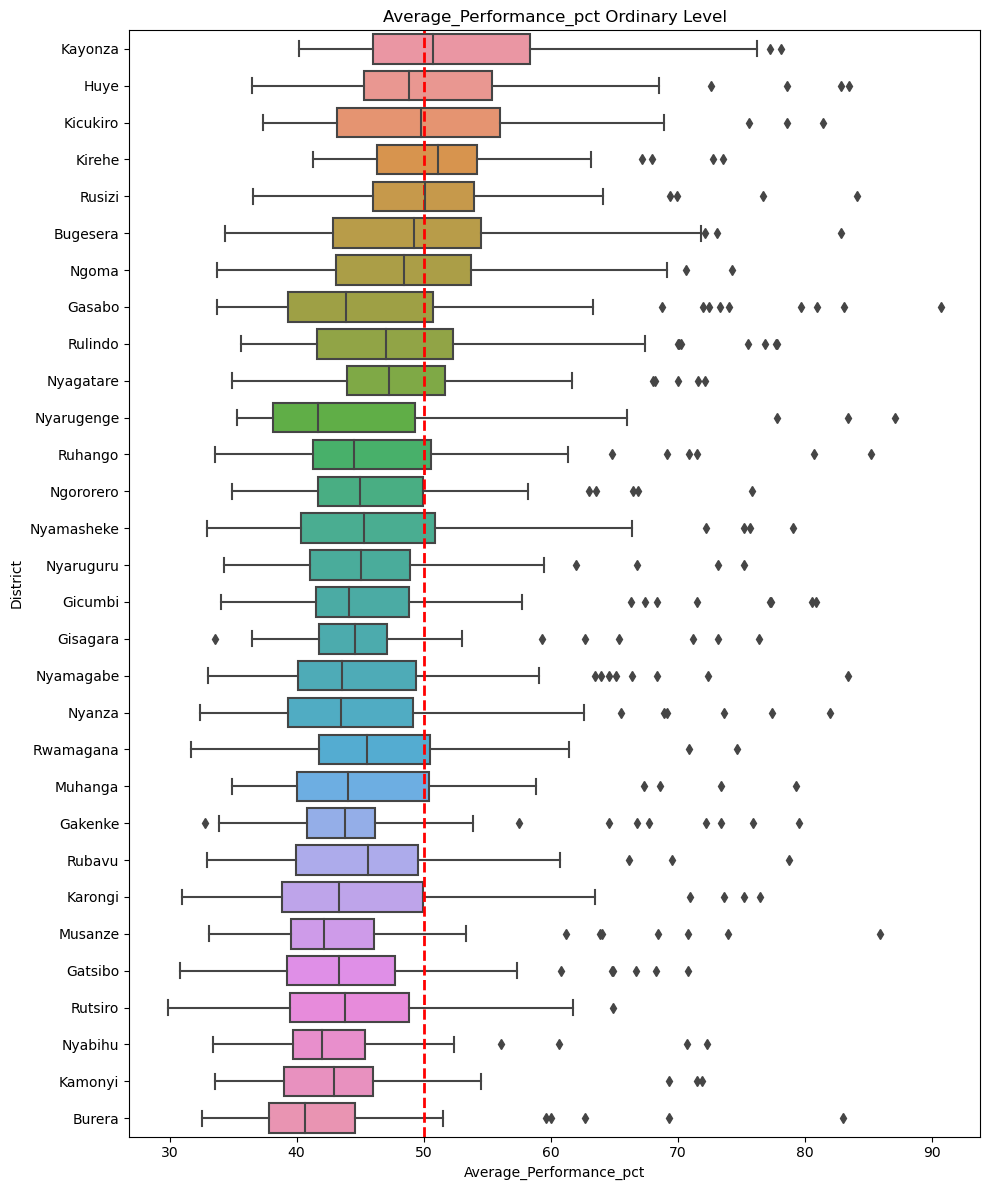

In [6]:
#primary 
chart_boxplots(xdataframe = df_ol ,
               xcolumn_group = 'District', 
               xcolumn_value = 'Average_Performance_pct',
               xtitle = 'Average_Performance_pct Ordinary Level',
              xfile_name = 'average_performance_ol.svg')

## maps

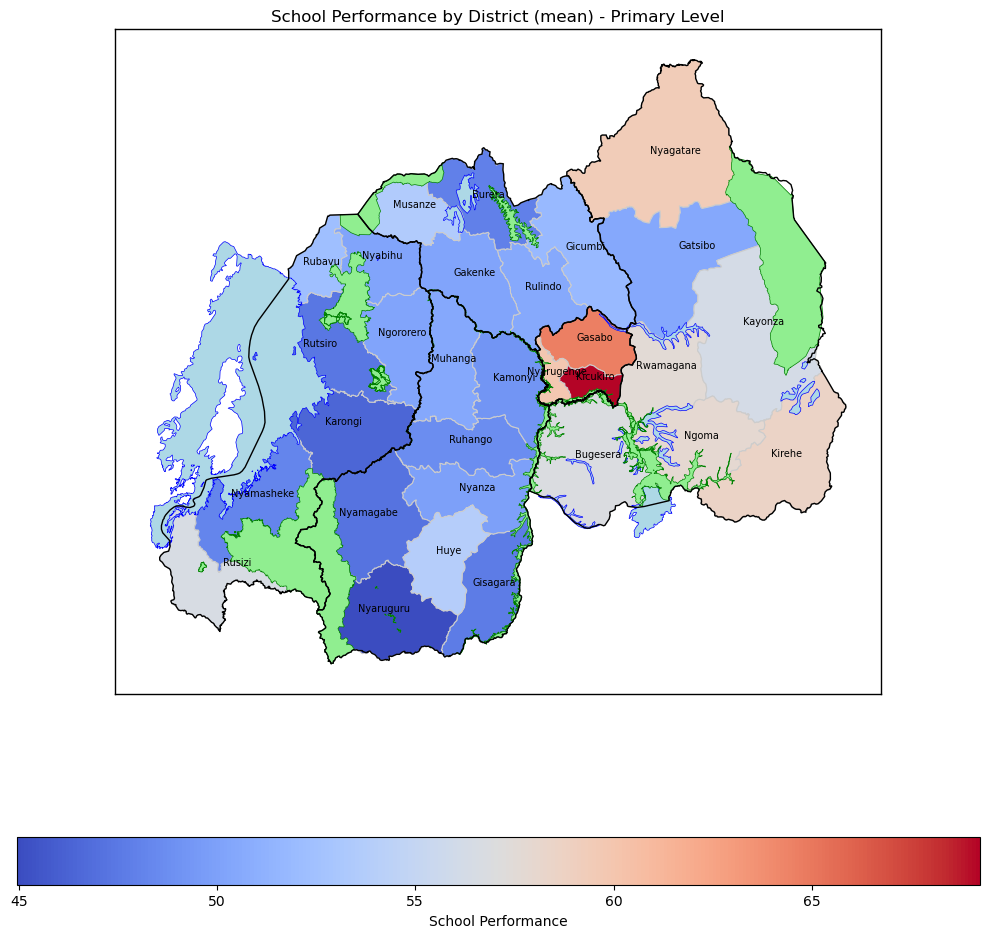

In [7]:
#primary
map_rwanda_choropleth_districts(xdataframe  = df_district_pl, 
                                    xcolumn = 'mean',
                                    xtitle = 'School Performance by District (mean) - Primary Level', 
                                    xlegend_label = "School Performance",
                                    xfile_name =  "rwanda_school_performance_pl.svg",
                                    xcolor_scheme = 'coolwarm')

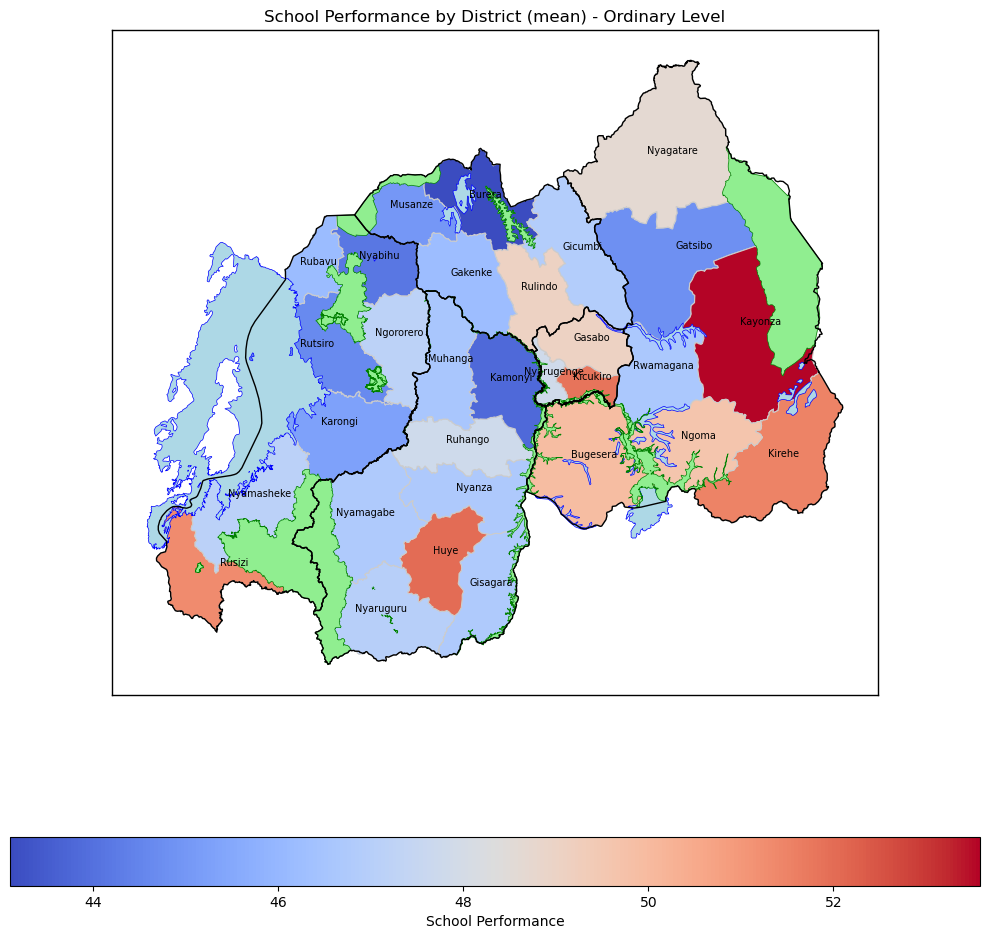

In [8]:
#ordinary level 
map_rwanda_choropleth_districts(xdataframe  = df_district_ol, 
                                    xcolumn = 'mean',
                                    xtitle = 'School Performance by District (mean) - Ordinary Level', 
                                    xlegend_label = "School Performance",
                                    xfile_name =  "rwanda_school_performance_ol.svg",
                                    xcolor_scheme = 'coolwarm')

## Number of schools by performance categories 

In [12]:
# Define the bins and labels for the performance categories
# Bins define the edges: [0, 25), [25, 50), [50, 75), [75, inf)
bins = [0, 25, 50, 75, float('inf')]
labels = ['<25%', '25%-49%', '50%-74%', '>=75%']

In [22]:
# Create a new column categorizing the performance using pd.cut
# 'right=False' makes the bins left-inclusive and right-exclusive, except for the last bin
df_pl['Performance_Category']= pd.cut(df_pl['Average_Performance_pct'], bins=bins, labels=labels, right=False, include_lowest=True) # include_lowest=True ensures 0 is included
df_ol['Performance_Category']= pd.cut(df_ol['Average_Performance_pct'], bins=bins, labels=labels, right=False, include_lowest=True) # include_lowest=True ensures 0 is included


In [24]:
# Create a frequency table (crosstab) of District vs. Performance_Category
tab_pl = pd.crosstab(df_pl['District'],df_pl['Performance_Category']).reset_index()

tab_ol = pd.crosstab(df_ol['District'],df_ol['Performance_Category']).reset_index()


tab_pl.to_excel('school_performance_category_pl.xlsx')
tab_ol.to_excel('school_performance_category_ol.xlsx')

tab_pl.head()

Performance_Category,District,25%-49%,50%-74%,>=75%
0,Bugesera,53,67,28
1,Burera,85,35,4
2,Gakenke,70,57,3
3,Gasabo,43,63,66
4,Gatsibo,91,44,11


In [ ]:
# Define the bins and labels for the performance categories
# Bins define the edges: [0, 25), [25, 50), [50, 75), [75, inf)
bins = [0, 25, 50, 75, float('inf')]
labels = ['<25%', '25%-49%', '50%-74%', '>=75%']

# Create a new column categorizing the performance using pd.cut
# 'right=False' makes the bins left-inclusive and right-exclusive, except for the last bin
df_district_pl['Performance_Category'] = df_district_pl.cut(df['Average_Performance_pct'], bins=bins, labels=labels, right=False, include_lowest=True) # include_lowest=True ensures 0 is included
df_ol['Performance_Category'] = df_ol.cut(df['Average_Performance_pct'], bins=bins, labels=labels, right=False, include_lowest=True) # include_lowest=True ensures 0 is included

# Create a frequency table (crosstab) of District vs. Performance_Category
frequency_table = pd.crosstab(df['District'], df['Performance_Category'])

# Print the resulting frequency table
frequency_table

In [9]:
df_district_pl.cut(df['Average_Performance_pct'], bins=bins, labels=labels, right=False, include_lowest=True) # include_lowest=True ensures 0 is included

AttributeError: 'DataFrame' object has no attribute 'cut'

In [ ]:
# dataframe 
xdataframe = df_2 
xcolumn = 'mean' #'median'

xtitle = 'School Performance by District (mean)'
xlegend_label = "School Performance"

xfile_name = "rwanda_school_performance.svg"

xcolor_scheme = 'coolwarm' # 'coolwarm' #'bwr' #'seismic' #'cividis' #'coolwarm'



map_rwanda_choropleth_districts(xdataframe  = df_pl,
                                xcolumn = 'mean',
                                xtitle = 'School Performance by District (mean) - Primary Level',
                                xlegend_label ,
                                xfile_name,
                                xcolor_scheme)



# Primary school 

In [ ]:
df = pd.read_excel('SchoolRanking.xlsx')

len(df)

df.head()

In [ ]:
q1 = list(df.District.drop_duplicates())
len(q1)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'.
# Replace this with your actual data loading


# --- Code to generate the vertical box plot ---

# 1. Calculate the average performance for each district
# We still need this to get the correct order
average_performance_by_district = df.groupby('District')['Average_Performance_pct'].mean().sort_values(ascending=False)

# 2. Get the order of districts based on average performance
district_order = average_performance_by_district.index

# 3. Create the vertical box plot using seaborn
# Swap x and y, and potentially adjust figure size for a taller plot
plt.figure(figsize=(10, 12)) # Increased height for vertical layout
sns.boxplot(x='Average_Performance_pct', y='District', data=df, order=district_order) # Swapped x and y

# Update title and labels for vertical orientation
plt.title('Distribution of Average Performance by District (Ranked by Average)')
plt.xlabel('Average Performance (%)') # X-axis is now performance
plt.ylabel('District')             # Y-axis is now district

# No need to rotate y-axis labels usually
# plt.yticks(rotation=0) # You can explicitly set rotation to 0 if needed

# Adjust layout
plt.tight_layout()

# Add a vertical line at x=50
plt.axvline(x=50, color='red', linestyle='--', linewidth=2)

# Show the plot
plt.show()

## AVERAGE PERFORMANCE 

In [ ]:
# Group by 'District' and apply the describe() method to 'Average_Performance_pct'
df_2 = df.groupby('District')['Average_Performance_pct'].describe().reset_index()

df_2.columns = ['district', 'count', 'mean', 'std', 'min', '25_pct', 'median', '75_pct', 'max']

df_2.head()

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


# dataframe 
xdf_data = df_2 
xcolumn = 'mean' #'median'

xtitle = 'School Performance by District (mean)'
xlegend_label = "School Performance"

xfile_name = "rwanda_school_performance.svg"

xcolors = 'coolwarm' # 'coolwarm' #'bwr' #'seismic' #'cividis' #'coolwarm'

xdata_geo       =  './geo_data/rwanda_boundaries_admin_2.geojson'    # admin 2 (districts)
xdata_geo_1     =  './geo_data/rwanda_boundaries_admin_1.geojson'    # admin 1 (provinces)
xdata_geo_lakes =  './geo_data/rwanda_lakes.geojson'                 # lakes 
xdata_geo_parks =  './geo_data/rwanda_protected_areas.geojson'       #protected areas 

# read geodata (district level)
xdf_geo_district = gpd.read_file(xdata_geo)
# read geodata (province level)
xdf_geo_province = gpd.read_file(xdata_geo_1)
# read geodata (lakes)
xdf_geo_lakes = gpd.read_file(xdata_geo_lakes)
# read geodata (parks)
xdf_geo_parks = gpd.read_file(xdata_geo_parks)


# Merge the district data with the district geodata
merged_df_district = xdf_geo_district.merge(xdf_data, left_on='shapeName', right_on='district', how='left')

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

merged_df_district.plot(column=xcolumn, 
                        cmap=xcolors , 
                        linewidth=0.8, 
                        ax=ax, 
                        edgecolor='0.8', 
                        legend=True,
                        legend_kwds={'label': xlegend_label,'orientation': "horizontal"})

# Plot the lakes
xdf_geo_lakes.plot(ax=ax, color='lightblue', edgecolor='blue', linewidth=0.5) # Using lightblue for fill and blue for outline
# Plot parcs 
xdf_geo_parks.plot(ax=ax, color='lightgreen', edgecolor='green', linewidth=0.5) # Using lightblue for fill and blue for outline

# Plot the province boundaries
xdf_geo_province.plot(ax=ax, color='none', edgecolor='black', linewidth=1)


# Add district labels with poverty rates
for idx, row in merged_df_district.iterrows():
    centroid = row['geometry'].centroid
    plt.annotate(text=f"{row['shapeName']}", # Keep only district name for labels
                 xy=(centroid.x, centroid.y),
                 xytext=(3, 3),
                 textcoords="offset points",
                 fontsize=7,
                 ha='center',
                 color='black')

# Set the title of the map
ax.set_title(xtitle )

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Add a border around the plot
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)


# Show the plot
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig(xfile_name, format="svg")

plt.show()


## NUMBER OF SCHOOL BY PERFORMANCE 

In [ ]:


# Define the bins and labels for the performance categories
# Bins define the edges: [0, 25), [25, 50), [50, 75), [75, inf)
bins = [0, 25, 50, 75, float('inf')]
labels = ['<25%', '25%-49%', '50%-74%', '>=75%']


# Create a new column categorizing the performance using pd.cut
# 'right=False' makes the bins left-inclusive and right-exclusive, except for the last bin
df['Performance_Category'] = pd.cut(df['Average_Performance_pct'], bins=bins, labels=labels, right=False, include_lowest=True) # include_lowest=True ensures 0 is included


# Create a frequency table (crosstab) of District vs. Performance_Category
frequency_table = pd.crosstab(df['District'], df['Performance_Category'])

# Print the resulting frequency table
frequency_table

## Ordinary level 



In [ ]:
df = pd.read_excel('SchoolRanking.xlsx', sheet_name='OrdinaryLevel')

print(len(df))


df.head()

In [ ]:
len(df.District.drop_duplicates())

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'.
# Replace this with your actual data loading


# --- Code to generate the vertical box plot ---

# 1. Calculate the average performance for each district
# We still need this to get the correct order
average_performance_by_district = df.groupby('District')['Average_Performance_pct'].mean().sort_values(ascending=False)

# 2. Get the order of districts based on average performance
district_order = average_performance_by_district.index

# 3. Create the vertical box plot using seaborn
# Swap x and y, and potentially adjust figure size for a taller plot
plt.figure(figsize=(10, 12)) # Increased height for vertical layout
sns.boxplot(x='Average_Performance_pct', y='District', data=df, order=district_order) # Swapped x and y

# Update title and labels for vertical orientation
plt.title('Distribution of Average Performance by District (Ranked by Average)')
plt.xlabel('Average Performance (%)') # X-axis is now performance
plt.ylabel('District')             # Y-axis is now district

# No need to rotate y-axis labels usually
# plt.yticks(rotation=0) # You can explicitly set rotation to 0 if needed

# Adjust layout
plt.tight_layout()

# Add a vertical line at x=50
plt.axvline(x=50, color='red', linestyle='--', linewidth=2)

# Show the plot
plt.show()

In [ ]:
# Group by 'District' and apply the describe() method to 'Average_Performance_pct'
df_2 = df.groupby('District')['Average_Performance_pct'].describe().reset_index()

df_2.columns = ['district', 'count', 'mean', 'std', 'min', '25_pct', 'median', '75_pct', 'max']

df_2.head()

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


# dataframe 
xdf_data = df_2 
xcolumn = 'mean' #'median'

xtitle = 'School Performance by District (mean)'
xlegend_label = "School Performance"

xfile_name = "rwanda_school_performance_ol.svg"

xcolors = 'coolwarm' # 'coolwarm' #'bwr' #'seismic' #'cividis' #'coolwarm'

### geoshapes 
xfolder_geo = '/home/mike/PycharmProjects/xDevTest/rwanda_maps/geo_data/'
xdata_geo       = xfolder_geo + 'rwanda_boundaries_admin_2.geojson'    # admin 2 (districts)
xdata_geo_1     = xfolder_geo + 'rwanda_boundaries_admin_1.geojson'    # admin 1 (provinces)
xdata_geo_lakes = xfolder_geo + 'rwanda_lakes.geojson'                 # lakes 
xdata_geo_parks = xfolder_geo + 'rwanda_protected_areas.geojson'       #protected areas 

# read geodata (district level)
xdf_geo_district = gpd.read_file(xdata_geo)
# read geodata (province level)
xdf_geo_province = gpd.read_file(xdata_geo_1)
# read geodata (lakes)
xdf_geo_lakes = gpd.read_file(xdata_geo_lakes)
# read geodata (parks)
xdf_geo_parks = gpd.read_file(xdata_geo_parks)


# Merge the district data with the district geodata
merged_df_district = xdf_geo_district.merge(xdf_data, left_on='shapeName', right_on='district', how='left')

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

merged_df_district.plot(column=xcolumn, 
                        cmap=xcolors , 
                        linewidth=0.8, 
                        ax=ax, 
                        edgecolor='0.8', 
                        legend=True,
                        legend_kwds={'label': xlegend_label,'orientation': "horizontal"})

# Plot the lakes
xdf_geo_lakes.plot(ax=ax, color='lightblue', edgecolor='blue', linewidth=0.5) # Using lightblue for fill and blue for outline
# Plot parcs 
xdf_geo_parks.plot(ax=ax, color='lightgreen', edgecolor='green', linewidth=0.5) # Using lightblue for fill and blue for outline

# Plot the province boundaries
xdf_geo_province.plot(ax=ax, color='none', edgecolor='black', linewidth=1)


# Add district labels with poverty rates
for idx, row in merged_df_district.iterrows():
    centroid = row['geometry'].centroid
    plt.annotate(text=f"{row['shapeName']}", # Keep only district name for labels
                 xy=(centroid.x, centroid.y),
                 xytext=(3, 3),
                 textcoords="offset points",
                 fontsize=7,
                 ha='center',
                 color='black')

# Set the title of the map
ax.set_title(xtitle )

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Add a border around the plot
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)


# Show the plot
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig(xfile_name, format="svg")

plt.show()

In [ ]:

# Define the bins and labels for the performance categories
# Bins define the edges: [0, 25), [25, 50), [50, 75), [75, inf)
bins = [0, 25, 50, 75, float('inf')]
labels = ['<25%', '25%-49%', '50%-74%', '>=75%']


# Create a new column categorizing the performance using pd.cut
# 'right=False' makes the bins left-inclusive and right-exclusive, except for the last bin
df['Performance_Category'] = pd.cut(df['Average_Performance_pct'], bins=bins, labels=labels, right=False, include_lowest=True) # include_lowest=True ensures 0 is included


# Create a frequency table (crosstab) of District vs. Performance_Category
frequency_table = pd.crosstab(df['District'], df['Performance_Category']).reset_index()

# Print the resulting frequency table
frequency_table

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy for arange

# Assume 'frequency_table' is your existing DataFrame like the one shown
# Make sure it includes all relevant performance category columns.
# Example frequency_table DataFrame (replace with your actual one):
data = {
    'District': ['Bugesera', 'Burera', 'Gakenke', 'Gasabo', 'Gatibo', 'Gicumbi', 'District X', 'District Y'],
    '< 25%': [10, 5, 8, 15, 12, 7, 20, 5], # Added '< 25%' column assuming it exists
    '25%-49%': [53, 85, 70, 43, 91, 59, 30, 40],
    '50%-74%': [67, 35, 57, 63, 44, 68, 40, 35],
    '>=75%': [28, 4, 3, 66, 11, 3, 10, 20]
}
#frequency_table = pd.DataFrame(data)

# Set 'District' as the index if it's not already and you prefer that
# if 'District' in frequency_table.columns:
#     frequency_table = frequency_table.set_index('District')

# Define the order of categories for plotting (important for X-axis order)
# Ensure all categories that might be in the data are listed
category_order = ['< 25%', '25%-49%', '50%-74%', '>= 75%'] # Adjust if you have more/different categories

# 1. Reshape the data from wide to long format
# If 'District' is an index, use ignore_index=False, else use id_vars=['District']
if frequency_table.index.name == 'District':
    long_form_data = frequency_table.melt(
        ignore_index=False, # Keep the District index
        var_name='Performance_Category', # Name of the new column for old column headers
        value_name='Number_of_Schools'   # Name of the new column for values
    )
    long_form_data = long_form_data.reset_index() # Convert index back to a column
else: # Assuming 'District' is a regular column
     long_form_data = frequency_table.melt(
        id_vars=['District'], # Keep 'District' as is
        var_name='Performance_Category', # Name of the new column for old column headers
        value_name='Number_of_Schools'   # Name of the new column for values
    )


# Ensure the Performance_Category is ordered correctly for plotting on the X-axis
long_form_data['Performance_Category'] = pd.Categorical(
    long_form_data['Performance_Category'], categories=category_order, ordered=True
)

# Ensure District order if desired (e.g., alphabetically or by a metric)
# By default, y-axis categories might be alphabetical.
# If you want a specific order, you can sort long_form_data['District']
# Example: Sorting by average total performance (requires calculating total per district first)
# district_order_by_total = frequency_table.sum(axis=1).sort_values(ascending=False).index
# long_form_data['District'] = pd.Categorical(
#     long_form_data['District'], categories=district_order_by_total, ordered=True
# )


# 2. Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(10, 8)) # Create figure and axes explicitly

# 3. Create the dot plot using seaborn.scatterplot on the created axes
sns.scatterplot(
    data=long_form_data,
    x='Performance_Category', # X-axis: the performance categories
    y='District',             # Y-axis: the districts
    size='Number_of_Schools', # Size of the dot is mapped to the count
    sizes=(50, 1000),         # Range of dot sizes (adjust min/max size as needed)
    alpha=0.8,                # Transparency of the dots
    color='steelblue',        # Single color for all dots (like in the example)
    ax=ax                     # Plot on the created axes
)

# --- Add the vertical lines ---
# Get the number of categories on the X-axis
num_categories = len(category_order)

# Calculate the positions for the vertical lines (between categories)
# These positions are 0.5, 1.5, 2.5, ... num_categories - 1.5
line_positions = np.arange(0.5, num_categories - 0.5, 1)

# Get the current y-axis limits
y_min, y_max = ax.get_ylim()

# Add the vertical lines
ax.vlines(x=line_positions, ymin=y_min, ymax=y_max, color='gray', linestyle='-', linewidth=0.8, alpha=0.7)

# Add title and labels
ax.set_title('Number of Schools per District by Performance Category')
ax.set_xlabel('Performance Category')
ax.set_ylabel('District')

# Add a legend for the dot sizes
# The scatterplot automatically creates a size legend if `size` is used.
# We need to ensure it's added to our axes and positioned correctly.
ax.legend(title='Number of Schools', bbox_to_anchor=(1.05, 1), loc='upper left')


# Optional: Add grid lines - you might want to remove the default ones if adding your own vlines
# plt.grid(axis='y', linestyle='--', alpha=0.6) # Keep horizontal grid for y-axis

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend

# Show the plot
plt.show()